In [1]:
from sklearn.datasets import get_data_home
get_data_home()

'/Users/Kunal/scikit_learn_data'

###### Placed the downloaded mnist-orginal.mat file in this folder as direct download is not working
###### fetch_mldata
###### You can find the file at :- 
https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib

In [5]:
X,y=mnist['data'],mnist['target']

In [6]:
X.shape

(70000, 784)

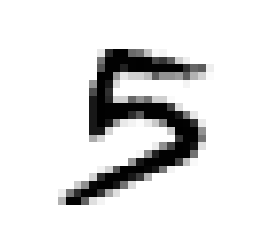

In [7]:
dig_img = X[31414]
some_dig_img = dig_img.reshape(28,28)

%matplotlib inline
imshow(some_dig_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [8]:
y[31414]

5.0

In [9]:
X_train, X_test, y_train, y_test= X[:60000],X[60000:],y[:60000],y[60000:]

In [10]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [11]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train, y_train=X[shuffle_index],y[shuffle_index]

In [12]:

y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [13]:
set(y_train_5)

{False, True}

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
#sgd_clf is digit 5 predictor
sgd_clf.predict([dig_img])

array([ True])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    cloned_sgd = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    cloned_sgd.fit(X_train_folds, y_train_folds)
    y_test_pred=cloned_sgd.predict(X_test_fold)
    
    n_correct=sum(y_test_pred==y_test_fold)
    print(n_correct/len(y_test_pred))

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9639196733605533


/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9200833333333334


/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9484166666666667


/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9655


/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9509959163263605


In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=5,scoring='accuracy')

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

array([0.96391967, 0.92008333, 0.94841667, 0.9655    , 0.95099592])

In [18]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
    
never_5_classifier = Never5Classifier()
cross_val_score(never_5_classifier,X_train, y_train_5, cv=5, scoring='accuracy')

array([0.91108333, 0.90791667, 0.90783333, 0.91041667, 0.911     ])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52624,  1955],
       [ 1058,  4363]])

In [21]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.6905666350110795

In [23]:
recall_score(y_train_5, y_train_pred)

0.8048330566316177

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7433341851946503

In [25]:
sgd_clf.decision_function([dig_img])

array([53674.69849583])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method='decision_function')

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

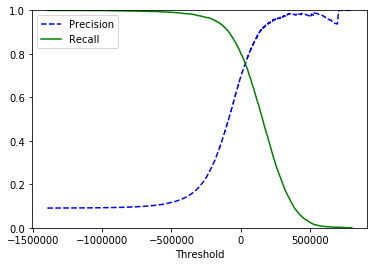

In [28]:
def plot_precion_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label='Precision' )
    plt.plot(thresholds, recalls[:-1], "g-", label='Recall' )
    plt.xlabel("Threshold")
    plt.ylim([0,1])
    plt.legend()
plot_precion_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

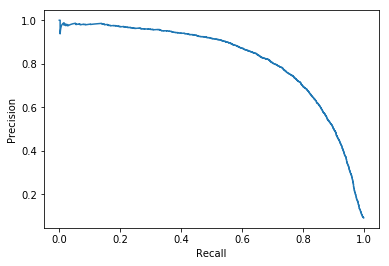

In [31]:
plt.plot(recalls, precisions )
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [32]:
y_pred =( y_scores > 111500 )

In [33]:
recall_score(y_train_5,y_pred)

0.604501014572957

In [34]:
precision_score(y_train_5,y_pred)

0.8687698833510075

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_train_5, y_train_pred)

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    

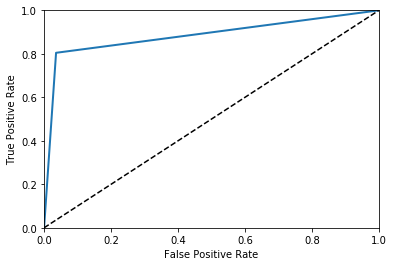

In [37]:
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.959266489957597

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

y_probab_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=5, method='predict_proba')

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
y_probab_forest[:,1]

array([0. , 0. , 0. , ..., 0.3, 0.1, 0. ])

In [41]:
y_scores = y_probab_forest[:,1] #prob of positive class

In [42]:
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5,y_scores)

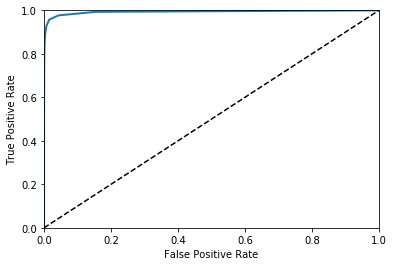

In [43]:
plot_roc_curve(fpr_forest,tpr_forest)

In [44]:
roc_auc_score(y_train_5, y_scores)

0.9931135921168059

In [45]:
y_train_preds = cross_val_predict(forest_clf, X_train, y_train_5, cv=5)

In [46]:
y_train_preds

array([False, False, False, ..., False, False, False])

In [47]:
precision_score(y_train_5,y_train_preds)

0.9839339991315675

In [48]:
recall_score(y_train_5,y_train_preds)

0.8360081165836561

In [49]:
sgd_clf.fit(X_train, y_train)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [50]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [51]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([dig_img])

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

array([3.])

In [52]:
sgd_clf.predict([dig_img])

array([3.])

In [53]:
ovo_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [54]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict([dig_img])

array([5.])

In [55]:
forest_clf.predict_proba([dig_img])

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [56]:
forest_clf.predict_proba([X[10002]])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [57]:
cross_val_score(sgd_clf,X_train, y_train, scoring='accuracy',cv=5)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

array([0.85864223, 0.86285619, 0.85825   , 0.86821705, 0.82852618])

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, scoring='accuracy', cv=5)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

array([0.91103707, 0.91659723, 0.91083333, 0.90922731, 0.90555185])

In [59]:
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/Kunal/ana

In [60]:
conf_mx = confusion_matrix( y_train, y_train_pred )

In [61]:
conf_mx

array([[5735,    2,   20,   10,   12,   48,   45,    9,   40,    2],
       [   1, 6478,   44,   24,    6,   45,    7,    9,  115,   13],
       [  59,   39, 5341,   85,   83,   26,   93,   55,  163,   14],
       [  51,   40,  144, 5331,    3,  244,   34,   53,  140,   91],
       [  16,   28,   38,    9, 5377,   11,   52,   34,   89,  188],
       [  72,   45,   35,  168,   73, 4639,  106,   26,  167,   90],
       [  37,   25,   52,    2,   39,   86, 5626,    5,   45,    1],
       [  21,   20,   72,   32,   54,   11,    4, 5814,   16,  221],
       [  49,  147,   67,  148,   11,  163,   56,   26, 5041,  143],
       [  41,   36,   28,   89,  159,   38,    2,  215,   84, 5257]])

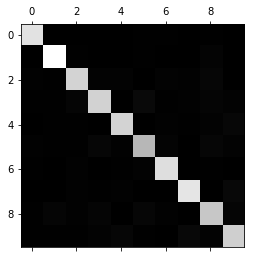

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

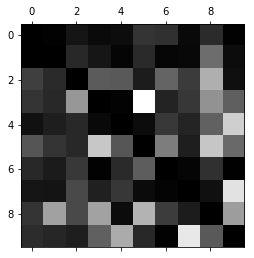

In [63]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [64]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

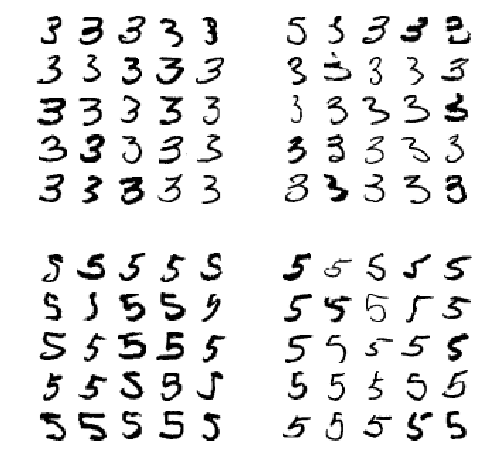

In [65]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_pred==cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [66]:
y_train

array([0., 7., 4., ..., 8., 0., 8.])

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
knn.predict([dig_img])

array([[False,  True]])

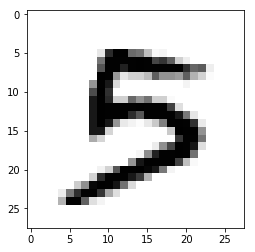

In [75]:
imshow(dig_img.reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

In [76]:
y_train_knn_pred=cross_val_predict(knn, X_train, y_train, cv=3)

In [77]:
f1_score(y_train, y_train_knn_pred, average='macro')

0.9687801433806273

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_train, y_train_knn_pred)

0.9689333333333333

In [82]:
forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
y_train_forest_pred=cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [87]:
f1_score(y_train,y_train_forest_pred,average='macro')

0.938912480110044

In [88]:
accuracy_score(y_train,y_train_forest_pred)

0.9396833333333333

In [93]:
from sklearn.model_selection import GridSearchCV

In [101]:
knn = KNeighborsClassifier()
params_distribution=[
    {'n_neighbors' : [3,4,5] ,'weights' : ['uniform','distance'] }
]
grid_search = GridSearchCV(knn, params_distribution, n_jobs=-1, verbose=2, cv=2)

In [102]:
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] ................... n_neighbors=3, weights=uniform, total=29.7min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] .................. n_neighbors=3, weights=distance, total=29.8min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] .................. n_neighbors=3, weights=distance, total=29.8min
[CV] n_neighbors=4, weights=distance .................................
[CV] ................... n_neighbors=3, weights=uniform, total=29.8min
[CV] n_neighbors=4, weights=distance .................................
[CV] ................... n_neighbors=4, weights=uniform, total=31.5min
[CV] n_neighbors=

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 182.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 182.2min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [103]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [111]:
knn_clf = KNeighborsClassifier(n_jobs=-1,**grid_search.best_params_)

In [112]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [113]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [114]:
knn_preds = knn_clf.predict(X_train)
accuracy_score(y_train,knn_preds)

1.0

In [116]:
y_pred = grid_search.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.9714

In [121]:
from scipy.ndimage.interpolation import shift

In [122]:
shift

<function scipy.ndimage.interpolation.shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)>

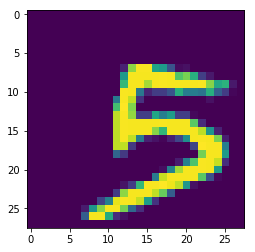

In [137]:
imshow(shift(dig_img.reshape(28,28), shift=(2,3)))

In [125]:
shift

<function scipy.ndimage.interpolation.shift(input, shift, output=None, order=3, mode='constant', cval=0.0, prefilter=True)>